In [ ]:
# GROUP 13 ODL Assignment
# Team Member
# Lee Seng Ken TP050874
# Lai Yen Fong TP050853
# Khoo Ven Jin TP051207

DATA PREPROCESSING

Data: Kaggle = https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Description: This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

Target Variable: Stroke (Binary)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Preprocessing
#
# Problem Statement: To predict the likeliness of a patient to encounter stroke
# with 0 being 'not likely' and 1 being 'likely'
#
# Purpose: Remove any anomalies spotted in EDA so that the data is more accurate
# to solve the problem statement
#
# Flow: EDA -> Data Preprocessing
#
# Steps Taken:
# 1) Understand and explore scope of data (use: shape for dimensions, info to check data_types,
# describe to view proportion of numerical data, unique/nunique to check unique data of classification attributes)
#
# 2) Adjust Incorrect Attribute Data Types (Optional: If needed, checked in info, unique)
# Reason to wrong data type: could be typo error, mispell, capitalization, wrong format,
# misinterpretation of attribute during data fill-ups etc.
# Steps: detect the rows involved -> replace value with attribute's mean -> re-check data_type (either replace or astype)
# 
# 3) Handle Duplication Data (Deletion, mostly CATEGORICAL/string)
# Reason to duplication: could be database or function problem, runtime issue, human mistakes (customer inputs twice)
# Steps: identify attribute data that CANNOT be duplicated (e.g: id) -> detect duplicated attribute data (column) ->
# detect duplicated records (rows) -> delete duplication (use drop w/ axis) 
#
# 4) Perform 1st EDA (visually & statistically detect & remove outliers)
# Reason to EDA: To explore patterns, find out anomalies such as outliers, and test hypothesis and early assumptions which
# further helps in understanding the data to make better future analysis
# Steps: do Descriptive Statistical Information (done w/ describe; compare std w/ mean) -> highlight attributes w/ outlier (min & max) ->
# plot boxplot, histogram, scatterplot (to verify) -> detect rows/col involved -> decision to remove or replace (use drop or replace) ->
# re-check EDA
#
# (VERY IMPORTANT: We put removing outliers before handling missing data because if we decide
# to impute missing data with mean, the imputed data is affected by the outlier's value)
# 5) Handle Missing Data (Deletion or Imputation)
# Reason to missing data: could be sensitive data, typo error etc.
# Steps: detect rows/col involved -> decision to delete or impute based on %/No. of Missing ->
# delete/impute data (use isnull/fillna/simpleimputer)
#
# 6) Perform Label Encoding (for Categorical data)
# Reason: to convert string data into numerical data so that is readable by binary machine
# Steps: detect col involved -> do label encoding (use simpleEncoder, factorize, onehotencoder)
#
# 7) Perform Variable Assignment (x and y dataset)
# Reason: to select suitable input dataset which influences target variable dataset
# Steps: check significance of x to y (use OSL) -> remove low significance -> check correlation between attributes (use corrs, heatmap) ->
# take 1 high correlated attribute -> assign inputs to x, assign TV to y (use select, iloc) -> recheck significance (OSL)
#
# 8) Perform Class Balancing (for Categorical data)
# Steps: detect TV -> do class balancing (over-sampling or under-sampling)
#
# 9) Perform Normalization (for NN)
# Reason: to obtain mean close to 0 via scale down, so that learning rate is optimal and faster convergence
# Steps: normalize x -> check normalized_x (use normalize)
#
# 10) Perform Data Splitting (train set, test set, x, y)
# Reason: to split train and test dataset; train set use to build model with default hyperparameter algorithm;
# test set use to get predicted values to be evaluated against actual y value
# Steps: split x and y into trainx, testx, trainy, testy (define split ratio and random state)
#
# 11) Build and Train Model Solution (w/ DL algorithm selected)
# Reason: to get equation of solution to solve the problem statement
# Steps: select algorithm -> set hyperparameters -> fit and transform -> predict using testx 
#
# 12) Evaluate Result (Numerical or Categorical)
# Reason: to evaluate the 'accuracy' or how optimal or trustworthy is the model solution to solve the problem
# Steps: select score -> evaluate ypred against yactual
#
# 13) Perform Optimization and HyperParameterTuning (search for better model)
# Reason: to improve the accuracy of the model to solve the problem statement
# Steps: select suitable method -> search for optimal hyperparameters -> build the optimal model ->
# evaluate optimal result vs previous result -> Present findings via plottings
# 
# Load Dataset using pandas
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# View first 5 rows
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# STEP 1 (Understand and explore scope of data)
#
# View data dimensions (row, column)

count_label = np.asarray(['No. of Records', 'No. of Columns:'])

dict_created = {}
for index, i in enumerate(count_label):
    dict_created[i] = data.shape[index]

pd.DataFrame(dict_created,index=["count"]).transpose()

,count
No. of Records,5110
No. of Columns:,12


In [ ]:
# Understand the variables or column exist within the dataset
#
# List down all the name of the columns within the dataset
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# STEP 2 (Adjust Incorrect Attribute Data Types)
#
# Check data types
# Verdict: All attributes are in correct data type, 7 int types, 5 string
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# View number of unique data in each attribute
# Verdicts:
# 1) From this, take low unique count and display unique data to validate value
dict_created = {}
for i in list(data.columns):
    dict_created[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict_created,index=["unique count"]).transpose()

,unique count
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


In [ ]:
# View unique data in each attribute
# Verdicts:
# 1) Find out more about 'Other' in gender column
# 2) Find out more about 'children' in work_type column
# 3) Find out more about 'Unknown' in smoking_status column
# 4) Standardize all data to lowercase
data_select = data[['gender', 'hypertension', 'heart_disease', 'ever_married',
                   'work_type', 'Residence_type', 'smoking_status', 'stroke']]
dict_created = {}
for i in list(data_select.columns):
    dict_created[i] = ', '.join(str(x) for x in data_select[i].unique())

pd.DataFrame(dict_created,index=["unique value"]).transpose()

,unique value
gender,"Male, Female, Other"
hypertension,"0, 1"
heart_disease,"1, 0"
ever_married,"Yes, No"
work_type,"Private, Self-employed, Govt_job, children, Ne..."
Residence_type,"Urban, Rural"
smoking_status,"formerly smoked, never smoked, smokes, Unknown"
stroke,"1, 0"


In [ ]:
# View Summary of Data
# Verdicts:
# 1) Correct 7 int attributes displayed
# 2) Outliers suspected (std > mean) = hypertension, heart_disease, stroke (ignore)
# 3) Outliers to consider (min, max values) = age (min = 0.08), avg_glucose_level (min = 55.12, max = 271.74), but still consider BMI (max = 97)
# 4) BMI has missing records = (5110 total - 4909: 201 missing data)
#
# Citation Acceptable Glucose Level (70-200): https://www.singlecare.com/blog/normal-blood-glucose-levels/#:~:text=A%20normal%20blood%20glucose%20level,90%20to%20110%20mg%2FdL.
# Citation Acceptable BMI Value (9-105 <- Highest BMI ever recorded): https://bmicalculator.mes.fm/bmi-chart
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# View record having 'Other' as 'gender'
# Verdicts:
# 1) Since the count is 1, Discard this record later
display(data[data['gender'] == 'Other'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
# View record having 'children' as 'work_type'
# Verdicts:
# 1) There is 687 records having children, so it is not a mistype, Do Nothing about it
display(data[data['work_type'] == 'children'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,55680,Male,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [ ]:
# Calculate percentage of record having 'Unknown' as 'smoking_status'
percentage_unknown = round(data[data['smoking_status'] == 'Unknown'].shape[0]/data.shape[0]*100, 2)
print('Percentage of data Unknown as smoking_status',
      percentage_unknown, '%')

Percentage of data Unknown as smoking_status 30.22 %


In [ ]:
# View record having 'Unknown' as 'smoking_status'
# Verdicts:
# 1) There is 1544 records having Unknown, which is 30.22% pretty high, 2 options:
# take it as it is or replace with mode ; CANNOT DISCARD because too many records,
# if discard, data is not accurate anymore
# Answer: Take it as it is (Do nothing)
display(data[data['smoking_status'] == 'Unknown'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [ ]:
# Handle Capitalization and 1 record of 'Other' as 'gender'
# Drop data
data.drop(data.index[data['gender'] == 'Other'], inplace = True)

# Reset index of dataframe
data = data.reset_index(drop = True)
print('Unique data in gender', data['gender'].unique())
print('Total Records: ', data.shape[0])

Unique data in gender ['Male' 'Female']
Total Records:  5109


In [ ]:
# Change all to lowercase
data['gender'] = data['gender'].str.lower()
data['ever_married'] = data['ever_married'].str.lower()
data['work_type'] = data['work_type'].str.lower()
data['Residence_type'] = data['Residence_type'].str.lower()
data['smoking_status'] = data['smoking_status'].str.lower()

data_select = data[['gender', 'hypertension', 'heart_disease', 'ever_married',
                   'work_type', 'Residence_type', 'smoking_status', 'stroke']]
dict_created = {}
for i in list(data_select.columns):
    dict_created[i] = ', '.join(str(x) for x in data_select[i].unique())

pd.DataFrame(dict_created,index=["unique value"]).transpose()

,unique value
gender,"male, female"
hypertension,"0, 1"
heart_disease,"1, 0"
ever_married,"yes, no"
work_type,"private, self-employed, govt_job, children, ne..."
Residence_type,"urban, rural"
smoking_status,"formerly smoked, never smoked, smokes, unknown"
stroke,"1, 0"


In [ ]:
# STEP 3 (Handle Duplication Data)
#
# Verdicts:
# 1) No duplicated records detected, can skip this step
# Detect duplicated records by id
print("Number of duplicated ID: ", data[data.columns[0]].duplicated().sum())

# Detect duplicated records by all attributes
print("Number of duplicated Records: ", data.duplicated().sum())

Number of duplicated ID:  0
Number of duplicated Records:  0


<function matplotlib.pyplot.show>

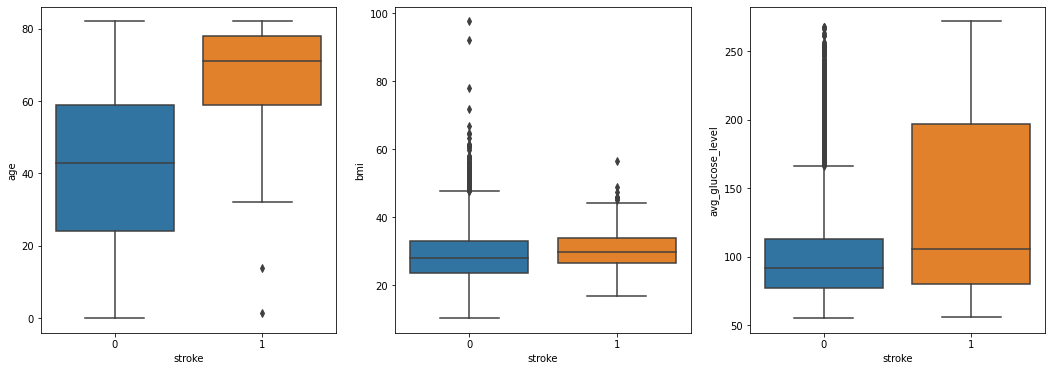

In [ ]:
# STEP 4 (Perform 1st EDA)
# Descriptive Statistical Information is DONE ALREADY EARLIER
# ...bringing the verdict:
# 1) Outliers suspected (std > mean) = hypertension, heart_disease, stroke (ignore)
# 2) Outliers to consider (min, max values) = age (min = 0.08), avg_glucose_level
# (min = 55.12, max = 271.74), but still consider BMI (max = 97)
#
# Plot boxplot (Handling verdict 2: age, avg_glucose_level, bmi)
# ----------------------------------------------------------------
# Boxplot shows how well your data is dispersed and distributed which tells you if your
# data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
# Even they show outliers visibly that is position OUTSIDE OF MAX or MIN boundary.
# ----------------------------------------------------------------
# Verdicts:
# 1) Age against Stroke boxplot shows outliers
# 2) BMI against Stroke boxplot shows outliers (dot is spread so far away when Stroke = 0)
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6) , squeeze=True) # Segment subplots arranged as 1 row and 3 columns

sns.boxplot(data=data, y=data['age'], x=data['stroke'], ax=axes[0]) # axes refers to column positioning when row is 1
sns.boxplot(data=data, y=data['bmi'], x=data['stroke'], ax=axes[1])
sns.boxplot(data=data, y=data['avg_glucose_level'], x=data['stroke'], ax=axes[2])

plt.show

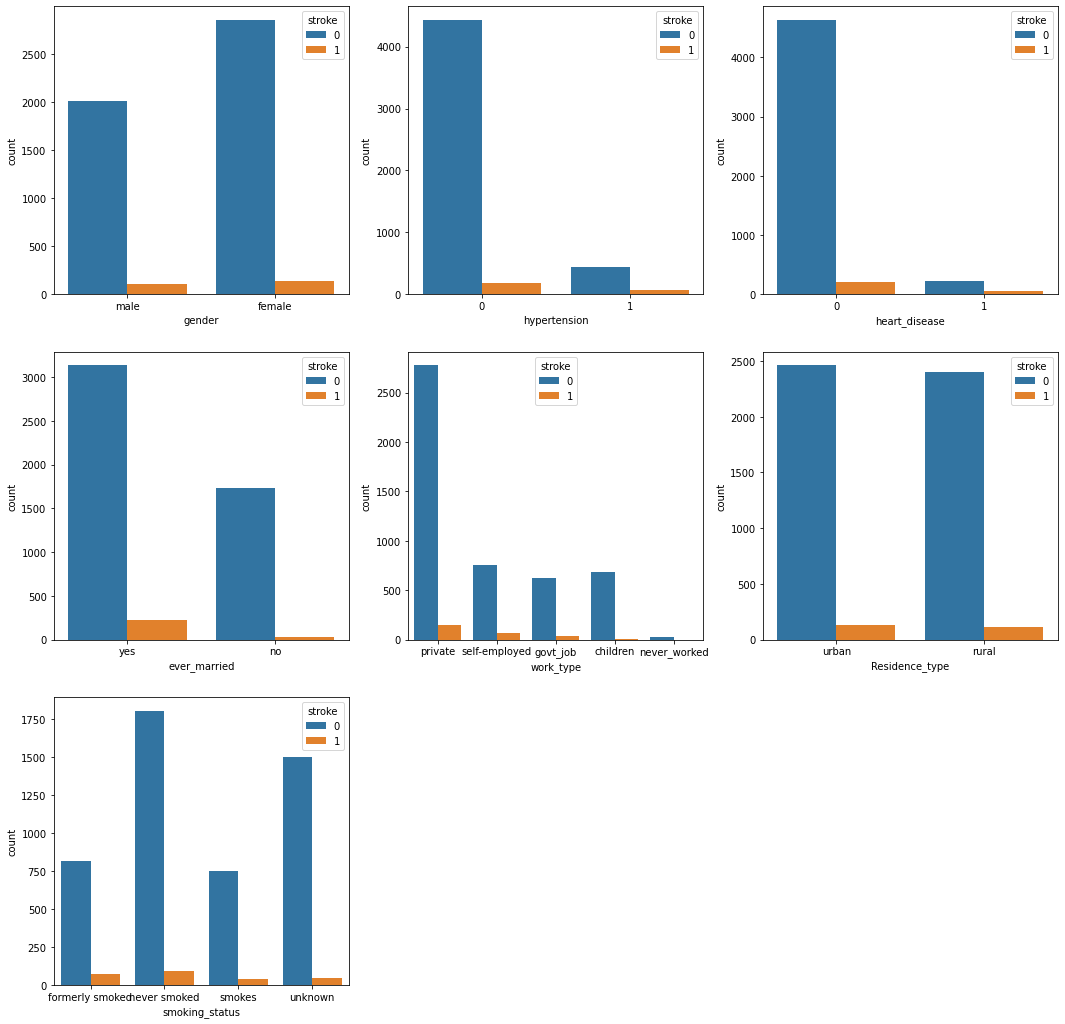

In [ ]:
# Plot histogram (Handling verdict 1: hypertension, heart_disease, and others)
# -----------------------------------------------------
# Histogram shows the frequency comparison between 2 or more types of attributes or
# data value which helps us to decide actions to take on the distribution shown,
# It shows the Relationship too between x and y
# -----------------------------------------------------
# Verdicts:
# 1) There are more people w/o stroke than w/ stroke which means the data is not
# balanced
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))

fig.delaxes(ax=axes[2,1]) # to delete extra subplots located at row 2, col 1 & 2
fig.delaxes(ax=axes[2,2])

sns.countplot(x="gender", hue='stroke', data=data , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', data=data , ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', data=data , ax=axes[0,2])

sns.countplot(x="ever_married", hue='stroke', data=data , ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', data=data , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', data=data , ax=axes[1,2])

sns.countplot(x="smoking_status", hue='stroke', data=data , ax=axes[2,0])

plt.show()

<function matplotlib.pyplot.show>

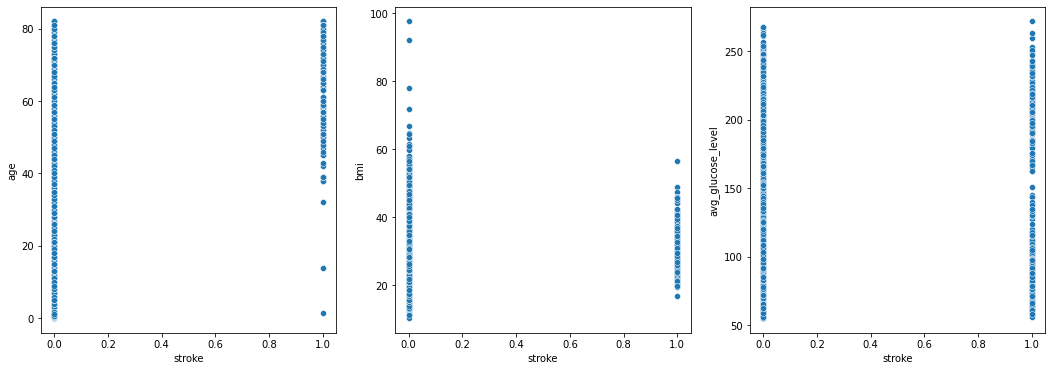

In [ ]:
# Plot scatterplot (Handling verdict 2: age, avg_glucose_level, bmi)
# ----------------------------------------------------
# Scatterplot reveals outliers which are spread far away from the mean
# ----------------------------------------------------
# Verdicts:
# 1) To confirm verdicts in boxplot, BMI and age have outliers.
# However, these are against stroke. We must confirm individually w/o stroke.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6) , squeeze=True)

sns.scatterplot(data=data, x=data['stroke'], y=data['age'], ax=axes[0])
sns.scatterplot(data=data, x=data['stroke'], y=data['bmi'], ax=axes[1] )
sns.scatterplot(data=data, x=data['stroke'], y=data['avg_glucose_level'], ax=axes[2])

plt.show

<function matplotlib.pyplot.show>

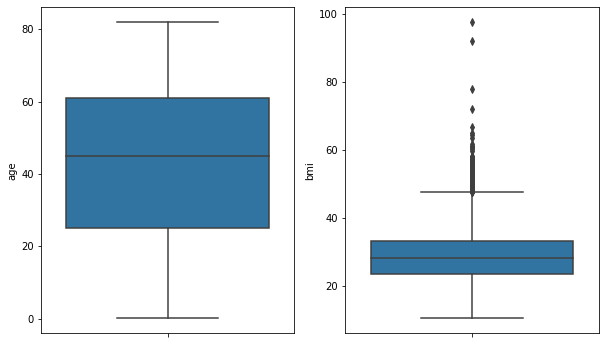

In [ ]:
# To Re-Confirm outliers in age and BMI
# Plot Individual Boxplot
# Verdicts:
# 1) Age shows NO outliers, while BMI still shows outliers of value > 70.
# Therefore, conduct outliers removal on BMI respectively
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6) , squeeze=True)

sns.boxplot(data=data, y=data['age'], ax=axes[0])
sns.boxplot(data=data, y=data['bmi'], ax=axes[1])

plt.show

In [ ]:
# Display rows with 'bmi' > 70
# Verdicts:
# 1) It shows 4 records of outliers which is VERY SMALL to 5109 total records,
# therefore not an issue to discard these outliers
display(data[data['bmi'] > 70])

# Discard outliers
data.drop(data.index[data['bmi'] > 70], inplace = True)

# Reset index of data
data = data.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,male,42.0,0,0,yes,private,rural,210.48,71.9,never smoked,0
928,41097,female,23.0,1,0,no,private,urban,70.03,78.0,smokes,0
2128,56420,male,17.0,1,0,no,private,rural,61.67,97.6,unknown,0
4208,51856,male,38.0,1,0,yes,private,rural,56.90,92.0,never smoked,0


<function matplotlib.pyplot.show>

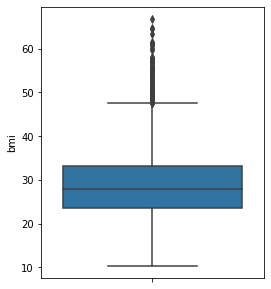

In [ ]:
# Checking outliers after handling outliers
# OUTLIERS ARE GONE!!!
plt.figure(figsize = (4,5)) # set figure size

sns.boxplot(data=data, y=data['bmi'])

plt.show

In [ ]:
# STEP 5 (Handle missing data)
#
# Check missing value
# Verdicts:
# 1) Yes, we were right, there are 201 missing data in 'bmi'
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Check percentage of missing data
# Verdicts:
# 1) Since 3.94% is very little, imputing it with mean shouldn't be
# much of hassle and it wont affect much to the overall data
print('Percentage of missing data: ', round(data['bmi'].isnull().sum()/data.shape[0]*100, 2), '%')

Percentage of missing data:  3.94 %


In [ ]:
# Impute missing data with mean
# MISSING DATA IS GONE!!!
data["bmi"] = data["bmi"].fillna(data["bmi"].mean())
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# STEP 6 (Perform Label Encoding)
# 
# Factorize Categorical Data to Numerical
data_select = data.select_dtypes(include='object')
for i in list(data_select.columns):
    data[i] = pd.factorize(data[i])[0]

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,28.848899,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.000000,1,1


In [ ]:
# Check encoding by viewing unique values
# LABEL ENCODING SUCCEEDED!!!
dict_created = {}
for i in list(data_select.columns):
    dict_created[i] = ', '.join(str(x) for x in data[i].unique())

pd.DataFrame(dict_created,index=["unique value"]).transpose()

,unique value
gender,"0, 1"
ever_married,"0, 1"
work_type,"0, 1, 2, 3, 4"
Residence_type,"0, 1"
smoking_status,"0, 1, 2, 3"


In [ ]:
# STEP 7 (Perform Variable Assignment)
#
# Dropping column that is not revelant which in this case, id column is not required as it is just the number of the record.
data = data.drop(['id'], axis = 1)

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,1,202.21,28.848899,1,1
2,0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,80.0,1,0,0,0,0,83.75,28.848899,1,0
5101,1,81.0,0,0,0,1,0,125.20,40.000000,1,0
5102,1,35.0,0,0,0,1,1,82.99,30.600000,1,0
5103,0,51.0,0,0,0,0,1,166.29,25.600000,0,0


In [ ]:
# As the Target Variable (TV) is stroke, the value for this column will be saved in Y, while the others will be saved in X as Input Variable (IV)
# Checking the correlation of the v

x = data.iloc[:, 0:9] # Input Variable
y = data.iloc[:, 10] # Target Variable

print (x)
print (y)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             0          0   
1          1  61.0             0              0             0          1   
2          0  80.0             0              1             0          0   
3          1  49.0             0              0             0          0   
4          1  79.0             1              0             0          1   
...      ...   ...           ...            ...           ...        ...   
5100       1  80.0             1              0             0          0   
5101       1  81.0             0              0             0          1   
5102       1  35.0             0              0             0          1   
5103       0  51.0             0              0             0          0   
5104       1  44.0             0              0             0          2   

      Residence_type  avg_glucose_level        bmi  
0                  0             2

In [ ]:
# Checking the correlation of between all the variables within the dataset, but more importantly is to understand the correlation between the target variable and the input variable.
#
# High correlation instance variable can be choosen as the main variable to be used for prediction
# If there are any variable that has high correlation between each other (> 0.8), it should be drop to pervent wrong prediction.
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.027581,-0.020448,-0.085856,-0.030443,-0.066295,-0.005237,-0.054606,0.030573,-0.038956,-0.009206
age,0.027581,1.000000,0.278548,0.263730,-0.679039,-0.413951,-0.013924,0.238175,0.336712,-0.375999,0.245193
hypertension,-0.020448,0.278548,1.000000,0.109005,-0.165981,-0.074077,0.007443,0.177020,0.150046,-0.130232,0.128636
heart_disease,-0.085856,0.263730,0.109005,1.000000,-0.114597,-0.058456,-0.002949,0.162013,0.041003,-0.064741,0.134868
ever_married,-0.030443,-0.679039,-0.165981,-0.114597,1.000000,0.376693,0.006272,-0.154872,-0.345354,0.303818,-0.108295
work_type,-0.066295,-0.413951,-0.074077,-0.058456,0.376693,1.000000,-0.014132,-0.068175,-0.345404,0.307869,-0.058408
Residence_type,-0.005237,-0.013924,0.007443,-0.002949,0.006272,-0.014132,1.000000,0.004588,-0.003063,-0.004343,-0.015329
avg_glucose_level,-0.054606,0.238175,0.177020,0.162013,-0.154872,-0.068175,0.004588,1.000000,0.174663,-0.097189,0.132074
bmi,0.030573,0.336712,0.150046,0.041003,-0.345354,-0.345404,-0.003063,0.174663,1.000000,-0.237350,0.040931
smoking_status,-0.038956,-0.375999,-0.130232,-0.064741,0.303818,0.307869,-0.004343,-0.097189,-0.237350,1.000000,-0.066461


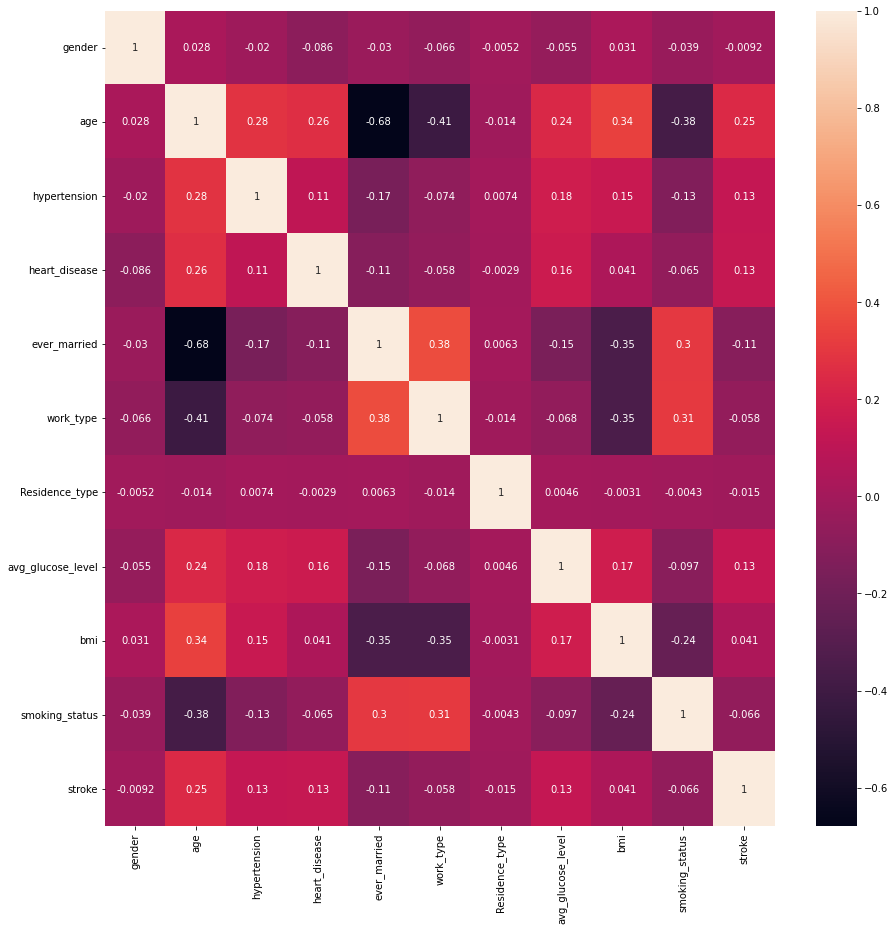

In [ ]:
# Heatmap is created to understand the correlation between the variable more easily.
#
# Since there are no variables that contain correlation over 0.8, no column will be dropped. 
# Based on the heatmap, the three variable that is most correlated to the target variable (stroke) are
# age, (hypertension, heart_disease, avg_glucose_level) = same value
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True)

In [ ]:
# Performing OLS Regression Result to check whether the IV and TV is related and suitable to be used as the input variable
#
# Adding constant into the existing x (input variable) for OLS Regression 
# Import statsmodel.api for OLS Regression
import statsmodels.api as sm
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print (est.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     49.32
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.01e-86
Time:                        10:05:12   Log-Likelihood:                 807.08
No. Observations:                5105   AIC:                            -1594.
Df Residuals:                    5095   BIC:                            -1529.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0903      0.01

In [ ]:
# Based on the OLS Regression result, we can determine that there are some input variable is not significant towards the target values 
# since the P value for the input variable is greater than the significant value (0.05)
# Input variable that is higher than the significant value include gender, work_type and Residence_type
# Therefore, these three column will be dropped from x

x.drop(columns = ['gender', 'work_type', 'Residence_type'], axis = 1, inplace = True)

In [ ]:
# the Input value will be tested in the OLS Regression Test again to check whether the IV and TV is suitable
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     73.43
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.62e-88
Time:                        10:05:12   Log-Likelihood:                 805.41
No. Observations:                5105   AIC:                            -1597.
Df Residuals:                    5098   BIC:                            -1551.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0836      0.01

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


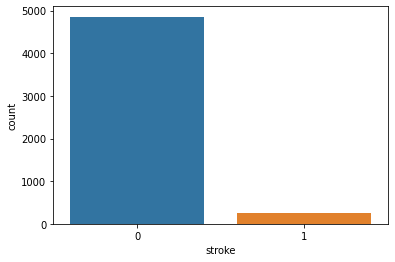

In [ ]:
# STEP 8 (Perform Class Balancing)
#
# Class Balancing is done on the Target Variable if the target variable is not balanced.
# Countplot is used to show the number of class amount in the stroke column.
sns.countplot(x = y)

1    4856
0    4856
Name: stroke, dtype: int64


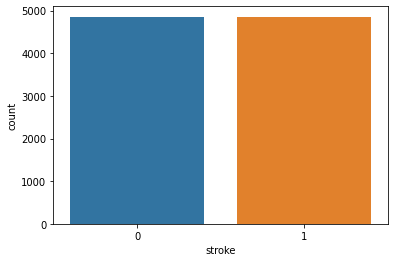

In [ ]:
# Based on graph, the number of patient that had stroke is significantly lower then the number of patient that does not have stroke.
# This means that the class for Target Variable to be extremely unbalanced
# Two methods to treat imbalanced class, Under or Over Sampling. 
# Oversampling is done to prevent data lost as the differences of the 0 and 1 is too much
# under sampling means that huge amount of data will be deleted
#
# Oversampling is done using SMOTE

from imblearn.over_sampling import SMOTE
x_b, y_b = SMOTE().fit_resample(x, y)
print(y_b.value_counts())
sns.countplot(x = y_b)

In [ ]:
# STEP 9 (Perform Normalization)
#
# Normalization is done with the help of sklearn

from sklearn.preprocessing import normalize

x_n = normalize(x_b)
x_n

array([[0.27789427, 0.        , 0.00414768, 0.        , 0.94853194,
        0.15180493],
       [0.2861544 , 0.        , 0.        , 0.        , 0.94857839,
        0.13533179],
       [0.58538907, 0.        , 0.00731736, 0.        , 0.77505513,
        0.23781431],
       ...,
       [0.3039678 , 0.        , 0.        , 0.        , 0.94265686,
        0.13784638],
       [0.57059408, 0.        , 0.        , 0.        , 0.80216824,
        0.17592186],
       [0.49032964, 0.00628882, 0.        , 0.        , 0.84561916,
        0.2108685 ]])

In [ ]:
# STEP 10 (Perform Data Splitting)
#
# Splitting the data into test and training data in the ratio of 2:8

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_n, y_b, test_size = 0.2, random_state = 2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7769, 6) (1943, 6) (7769,) (1943,)


In [ ]:
# The data is split into 80% for training test and 20% for testing test
# Train data -> 7769
# Test data -> 1943

**First Model**

Logistic Regression

In [ ]:
#import class 

#Logistic Regrssion
from sklearn.linear_model import LogisticRegression

#metrics part
from sklearn import metrics
from sklearn.metrics import f1_score,plot_confusion_matrix, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [ ]:
#instantiate LR model
log_reg = LogisticRegression()

#fir the LR model with data
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#perform prediction on test set
y_pred_log_reg = log_reg.predict(x_test)
y_pred_log_reg

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
#predict_proba method
log_reg.predict_proba(x_test)

array([[0.37380829, 0.62619171],
       [0.7300066 , 0.2699934 ],
       [0.89763145, 0.10236855],
       ...,
       [0.6751939 , 0.3248061 ],
       [0.79911597, 0.20088403],
       [0.42849782, 0.57150218]])

In [ ]:
# predict() method >> accept single argument and return arrays for predcited point
# predict_proba() method >> accept single argument return arrays list containg class probabilities

Classification report of Logistic Regression

> The closer the F1-score to 1.0, means the performance of the LR model is better the expected performance




In [ ]:
classification_report = classification_report(y_test, y_pred_log_reg)
print(classification_report)

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       984
           1       0.70      0.79      0.74       959

    accuracy                           0.73      1943
   macro avg       0.73      0.73      0.73      1943
weighted avg       0.73      0.73      0.73      1943



Confusion Matrix

In [ ]:
c_matrix = confusion_matrix(y_test, y_pred_log_reg)
c_matrix

array([[664, 320],
       [203, 756]])

Text(0.5, 257.44, 'Predicted label')

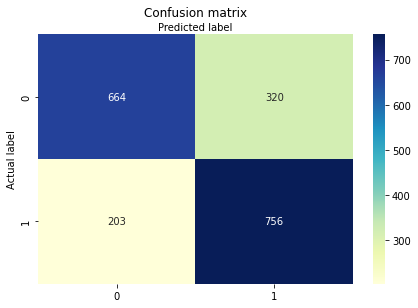

In [ ]:
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log_reg))
print("Precision:",metrics.precision_score(y_test, y_pred_log_reg))
print("Recall:",metrics.recall_score(y_test, y_pred_log_reg))

Accuracy: 0.7308286155429747
Precision: 0.7026022304832714
Recall: 0.7883211678832117


ROC curve

In [ ]:
predicted_probab_log = log_reg.predict_proba(x_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)
auc = metrics.roc_auc_score(y_test, predicted_probab_log)

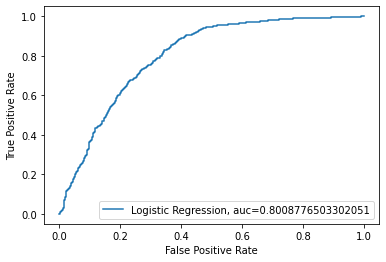

In [ ]:
from matplotlib import pyplot
pyplot.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**GRID SEARCH** Hyperparameter Tuning

In [ ]:
# finalize param_grid for hyperparameter tuning
param_grid = [
  {'penalty': ['l1'], 'solver': ['liblinear', 'saga'],
   'C' : np.logspace(-4, 4, 20),'max_iter' : [100, 1000,2500, 5000]},
  {'penalty': ['l2'], 'solver': ['lbfgs','newton-cg', 'sag'],
   'C' : np.logspace(-4, 4, 20),'max_iter' : [100, 1000,2500, 5000]},
 ]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(estimator =log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
clf_fit = clf.fit(x_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
clf_fit.best_estimator_

LogisticRegression(C=29.763514416313132, penalty='l1', solver='liblinear')

**Accuracy Checking**

In [ ]:
print (f'Accuracy : {clf_fit.score(x_train,y_train):.3f}')

Accuracy : 0.755


In [ ]:
clf_fit.best_score_

0.7560800993014203

The logistic regression has resulted with 0.72, however with Hyper-Parameter of Grid Searcg has score 0.75 

In [ ]:
 y_pred = clf_fit.predict(x_test)

Check the f1-score


In [ ]:
f1_score(y_test, y_pred)

0.7757805108798486

In [ ]:
test_acc = accuracy_score(y_test, y_pred)

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[649, 335],
       [139, 820]])

Confusion Matrix with Heatmap

Text(0.5, 257.44, 'Predicted label')

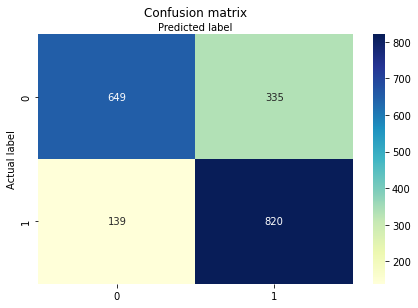

In [ ]:
# create heatmap
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Evaluation of Confusion Metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7560473494595985
Precision: 0.70995670995671
Recall: 0.8550573514077163


ROC Curve

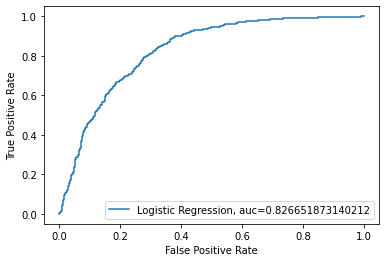

In [ ]:
predicted_probab = clf_fit.predict_proba(x_test)
predicted_probab = predicted_probab[:, 1]
auc = metrics.roc_auc_score(y_test, predicted_probab)
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

#ROC Curve Plotting
pyplot.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

The used of Grid Serch hyperparameter tuning has enhanced the value of prediction outcomes for the Logistic Regression model.

**Second Model** 

Deep Neuron Network Model

In [ ]:
# STEP 11 DNN Model
# Buiding the basic layout of the DNN model
#
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint

classifier = Sequential()

# define the IL and first HL
classifier.add(Dense(units = 350, kernel_initializer = "random_normal", activation = 'relu', input_dim = 6)) #number of neurons for the hidden layer
classifier.add(Dropout(0.2)) # preventing overfitting

# define another HL with 250 unit and Dropout of 0.2
classifier.add(Dense(units = 250,  kernel_initializer = "random_normal", activation = 'relu'))
classifier.add(Dropout(0.2)) # preventing overfitting

# OL
classifier.add(Dense(units = 1,  kernel_initializer = "random_normal", activation = 'sigmoid')) # TV is binary
classifier.add(Dropout(0.2)) # preventing overfitting

# compile
classifier.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
classifier.summary()

# model checkpoint
file = "Best_model.hdf5"
checkpoint = ModelCheckpoint(file, monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = "max")
callbacks_list = [checkpoint]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 350)               2450      
                                                                 
 dropout_6 (Dropout)         (None, 350)               0         
                                                                 
 dense_7 (Dense)             (None, 250)               87750     
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 251       
                                                                 
 dropout_8 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 90,451
Trainable params: 90,451
Non-trai

In [ ]:
# Fitting the data into the DNN model
history = classifier.fit(x_train,
                         y_train, 
                         validation_data = (x_test, y_test), 
                         batch_size = 32, 
                         epochs = 100, 
                         shuffle = True, 
                         verbose = 1, 
                         callbacks = callbacks_list)

Epoch 1/100
236/243 [============================>.] - ETA: 0s - loss: 2.0200 - accuracy: 0.6311
Epoch 1: val_accuracy improved from -inf to 0.71436, saving model to Best_model.hdf5
243/243 [==============================] - 2s 6ms/step - loss: 2.0205 - accuracy: 0.6329 - val_loss: 0.5562 - val_accuracy: 0.7144
Epoch 2/100
234/243 [===========================>..] - ETA: 0s - loss: 2.0295 - accuracy: 0.6863
Epoch 2: val_accuracy did not improve from 0.71436
243/243 [==============================] - 1s 5ms/step - loss: 2.0454 - accuracy: 0.6855 - val_loss: 0.5582 - val_accuracy: 0.7128
Epoch 3/100
242/243 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.6946
Epoch 3: val_accuracy did not improve from 0.71436
243/243 [==============================] - 1s 5ms/step - loss: 1.9470 - accuracy: 0.6940 - val_loss: 0.5808 - val_accuracy: 0.6799
Epoch 4/100
239/243 [============================>.] - ETA: 0s - loss: 2.0015 - accuracy: 0.6918
Epoch 4: val_accuracy improved f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


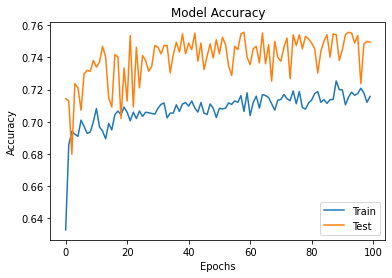

In [ ]:
# Displaying the Accuracy of the model in each epoch 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc = 'upper_left')
plt.show()

In [ ]:
# Perform Prediction using x_text, saving the prediction value into y_pred
classifier.load_weights('Best_model.hdf5')
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# STEP 11: (Evaluate Result)
# Evaluate Model by Accuracy, Precision, Recall and F1 Score
#
# The accuracy of the model is 0.755 which is within the acceptable range
# Same go towards the other score such as
# precison -> 0.756
# recall -> 0.744
# F1 score -> 0.75
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy of MLP Classifier: ', accuracy_score(y_test, y_pred))
print('Precision of MLP Classifier: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of MLP Classifier: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of MLP Classifier: ', f1_score(y_test, y_pred, average = 'binary'))

Accuracy of MLP Classifier:  0.7555326814204838
Precision of MLP Classifier:  0.7563559322033898
Recall of MLP Classifier:  0.7445255474452555
F1 Score of MLP Classifier:  0.7503941145559642


In [ ]:
# print out the similar result on accuracy, precision, recall and F1 score using the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       984
           1       0.76      0.74      0.75       959

    accuracy                           0.76      1943
   macro avg       0.76      0.76      0.76      1943
weighted avg       0.76      0.76      0.76      1943



In [ ]:
# Find out the value of TP, TF, FP, FF
# where the value will then show in the heatmpa in the following code
from sklearn.metrics import confusion_matrix, classification_report
cmap = confusion_matrix (y_test, y_pred)
cmap

array([[754, 230],
       [245, 714]])

Text(0.5, 257.44, 'Predicted label')

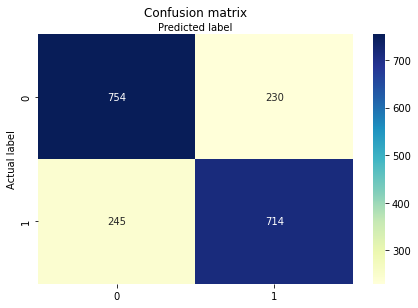

In [ ]:
# use to plot a heatmpa graph to show the value of TP, TF, FP, FF
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cmap), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

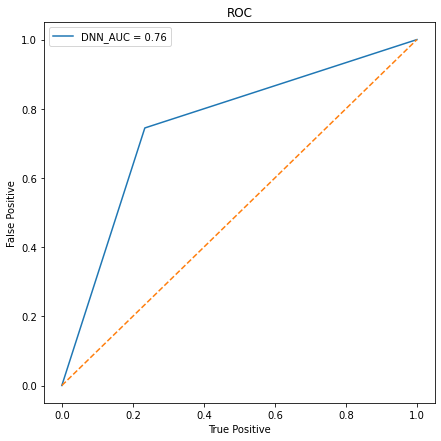

In [ ]:
# use to create the ROC curve graph (Receiver Operating Characteristic Curve graph)
# use to determine the AUC (Area Under the ROC Curve)
# the higher the value for ROC, the more accurate the model is
# the AUC value is 0.76 which within the acceptable range
import sklearn.metrics as metrics
FP, TP, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(FP, TP)

import matplotlib.pyplot as plt
plt.subplots(1, figsize = (7, 7))
plt.title('ROC') # Receiver Operating Characteristic
plt.plot(FP, TP, label = 'DNN_AUC = %0.2f' % roc_auc)
plt.plot([0, 1], ls = '--')
plt.xlabel("True Positive")
plt.ylabel("False Positive")
plt.legend()

In [ ]:
#pip install scikeras[tensorflow]
# to install scikeras to perform gridsearchcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# to perform gridCVSearch for Hyperparameter tuning
# in order to be able run, the model buidling is created using a function
def build_model():

  classifier = Sequential()

  # define the IL and first HL
  classifier.add(Dense(units = 350, kernel_initializer = "random_normal", activation = 'relu', input_dim = 6)) #number of neurons for the hidden layer
  classifier.add(Dropout(0.2)) # preventing overfitting

  # define another HL with 250 unit and Dropout of 0.2
  classifier.add(Dense(units = 250,  kernel_initializer = "random_normal", activation = 'relu'))
  classifier.add(Dropout(0.2)) # preventing overfitting

  # OL
  classifier.add(Dense(units = 1,  kernel_initializer = "random_normal", activation = 'sigmoid')) # TV is binary
  classifier.add(Dropout(0.2)) # preventing overfitting

  # compile
  classifier.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

  return classifier

# importing the libraries that is needed
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# saved the prebuild DNN into model variable
model = KerasClassifier(model = build_model, verbose = 2)

# the parameter that is going to be tuning include batch_size, epochs, and shuffle
batch_size = [16, 32, 64, 128]
epochs = [50, 100, 150]
shuffle = [True, False]

# add all the value into the dictionary
param_grid = dict()
param_grid['batch_size'] = batch_size
param_grid['epochs'] = epochs
param_grid['shuffle'] = shuffle

# perform GridSearch adn build the model accordingly to the best parameter
DNN_grid = GridSearchCV(model, param_grid, cv = 5, n_jobs = -1, verbose = 1)

# perform data fitting where the model will be trained using the train data under the best hyperparameter
DNN_grid = DNN_grid.fit(x_train, y_train)

print(DNN_grid.best_params_)
print(DNN_grid.best_score_)

In [ ]:
# Perform Prediction using x_text for the new tuned model, saving the prediction value into y_pred_best
y_pred_best = DNN_grid.best_estimator_.predict(x_test)
y_pred_best = (y_pred_best > 0.5)
y_pred_best

array([ True, False, False, ..., False,  True, False])

In [ ]:
# Evaluate the Tuned Model by Accuracy, Precision, Recall and F1 Score
#
# The accuracy of the model is 0.748 which is within the acceptable range but it has dropped compared to the original model
# Same go towards the other score such as
# precison -> 0.783 (increase)
# recall -> 0.678 (decrease)
# F1 score -> 0.72 (decrease)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy of MLP Classifier: ', accuracy_score(y_test, y_pred_best))
print('Precision of MLP Classifier: ', precision_score(y_test, y_pred_best, average = 'binary'))
print('Recall of MLP Classifier: ', recall_score(y_test, y_pred_best, average = 'binary'))
print('F1 Score of MLP Classifier: ', f1_score(y_test, y_pred_best, average = 'binary'))

Accuracy of MLP Classifier:  0.7488419969119917
Precision of MLP Classifier:  0.7833935018050542
Recall of MLP Classifier:  0.6788321167883211
F1 Score of MLP Classifier:  0.7273743016759776


In [ ]:
# print out the similar result on accuracy, precision, recall and F1 score using the classification report for tuned model
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       984
           1       0.78      0.68      0.73       959

    accuracy                           0.75      1943
   macro avg       0.75      0.75      0.75      1943
weighted avg       0.75      0.75      0.75      1943



In [ ]:
# Find out the value of TP, TF, FP, FF
# where the value will then show in the heatmap in the following code
newcmap = confusion_matrix (y_test, y_pred_best)
newcmap

array([[804, 180],
       [308, 651]])

Text(0.5, 257.44, 'Predicted label')

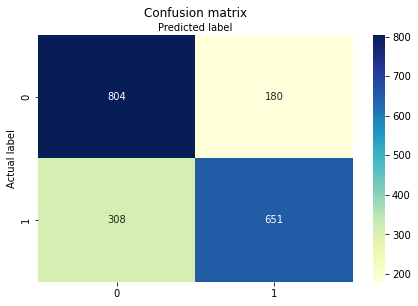

In [ ]:
# use to plot a heatmpa graph to show the value of TP, TF, FP, FF
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(newcmap), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

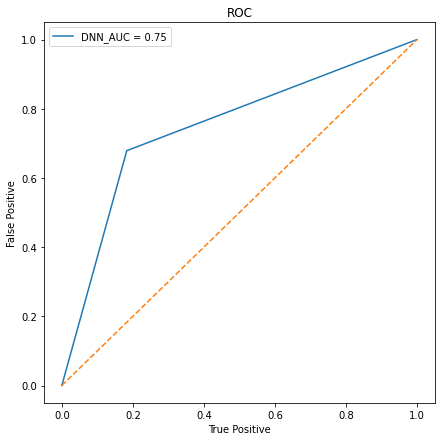

In [ ]:
# use to create the ROC curve graph (Receiver Operating Characteristic Curve graph)
# use to determine the AUC (Area Under the ROC Curve)
# the higher the value for ROC, the more accurate the model is
# the AUC value is 0.75 which has been dropped compare to the initial model (0.76)
# but it is still acceptable as it is within the acceptable range.
import sklearn.metrics as metrics
FP, TP, threshold = metrics.roc_curve(y_test, y_pred_best)
roc_auc = metrics.auc(FP, TP)

import matplotlib.pyplot as plt
plt.subplots(1, figsize = (7, 7))
plt.title('ROC') # Receiver Operating Characteristic
plt.plot(FP, TP, label = 'DNN_AUC = %0.2f' % roc_auc)
plt.plot([0, 1], ls = '--')
plt.xlabel("True Positive")
plt.ylabel("False Positive")
plt.legend()

**Third Model**


RNN

**Second Model** 

Deep Neuron Network Model

In [ ]:
# STEP 11 DNN Model
# Buiding the basic layout of the DNN model
#
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint

classifier = Sequential()

# define the IL and first HL
classifier.add(Dense(units = 350, kernel_initializer = "random_normal", activation = 'relu', input_dim = 6)) #number of neurons for the hidden layer
classifier.add(Dropout(0.2)) # preventing overfitting

# define another HL with 250 unit and Dropout of 0.2
classifier.add(Dense(units = 250,  kernel_initializer = "random_normal", activation = 'relu'))
classifier.add(Dropout(0.2)) # preventing overfitting

# OL
classifier.add(Dense(units = 1,  kernel_initializer = "random_normal", activation = 'sigmoid')) # TV is binary
classifier.add(Dropout(0.2)) # preventing overfitting

# compile
classifier.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
classifier.summary()

# model checkpoint
file = "Best_model.hdf5"
checkpoint = ModelCheckpoint(file, monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = "max")
callbacks_list = [checkpoint]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 350)               2450      
                                                                 
 dropout_6 (Dropout)         (None, 350)               0         
                                                                 
 dense_7 (Dense)             (None, 250)               87750     
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 251       
                                                                 
 dropout_8 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 90,451
Trainable params: 90,451
Non-trai

In [ ]:
# Fitting the data into the DNN model
history = classifier.fit(x_train,
                         y_train, 
                         validation_data = (x_test, y_test), 
                         batch_size = 32, 
                         epochs = 100, 
                         shuffle = True, 
                         verbose = 1, 
                         callbacks = callbacks_list)

Epoch 1/100
236/243 [============================>.] - ETA: 0s - loss: 2.0200 - accuracy: 0.6311
Epoch 1: val_accuracy improved from -inf to 0.71436, saving model to Best_model.hdf5
243/243 [==============================] - 2s 6ms/step - loss: 2.0205 - accuracy: 0.6329 - val_loss: 0.5562 - val_accuracy: 0.7144
Epoch 2/100
234/243 [===========================>..] - ETA: 0s - loss: 2.0295 - accuracy: 0.6863
Epoch 2: val_accuracy did not improve from 0.71436
243/243 [==============================] - 1s 5ms/step - loss: 2.0454 - accuracy: 0.6855 - val_loss: 0.5582 - val_accuracy: 0.7128
Epoch 3/100
242/243 [============================>.] - ETA: 0s - loss: 1.9459 - accuracy: 0.6946
Epoch 3: val_accuracy did not improve from 0.71436
243/243 [==============================] - 1s 5ms/step - loss: 1.9470 - accuracy: 0.6940 - val_loss: 0.5808 - val_accuracy: 0.6799
Epoch 4/100
239/243 [============================>.] - ETA: 0s - loss: 2.0015 - accuracy: 0.6918
Epoch 4: val_accuracy improved f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


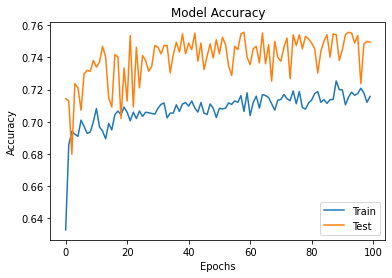

In [ ]:
# Displaying the Accuracy of the model in each epoch 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc = 'upper_left')
plt.show()

In [ ]:
# Perform Prediction using x_text, saving the prediction value into y_pred
classifier.load_weights('Best_model.hdf5')
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
# STEP 11: (Evaluate Result)
# Evaluate Model by Accuracy, Precision, Recall and F1 Score
#
# The accuracy of the model is 0.755 which is within the acceptable range
# Same go towards the other score such as
# precison -> 0.756
# recall -> 0.744
# F1 score -> 0.75
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy of MLP Classifier: ', accuracy_score(y_test, y_pred))
print('Precision of MLP Classifier: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of MLP Classifier: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of MLP Classifier: ', f1_score(y_test, y_pred, average = 'binary'))

Accuracy of MLP Classifier:  0.7555326814204838
Precision of MLP Classifier:  0.7563559322033898
Recall of MLP Classifier:  0.7445255474452555
F1 Score of MLP Classifier:  0.7503941145559642


In [ ]:
# print out the similar result on accuracy, precision, recall and F1 score using the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       984
           1       0.76      0.74      0.75       959

    accuracy                           0.76      1943
   macro avg       0.76      0.76      0.76      1943
weighted avg       0.76      0.76      0.76      1943



In [ ]:
# Find out the value of TP, TF, FP, FF
# where the value will then show in the heatmpa in the following code
from sklearn.metrics import confusion_matrix, classification_report
cmap = confusion_matrix (y_test, y_pred)
cmap

array([[754, 230],
       [245, 714]])

Text(0.5, 257.44, 'Predicted label')

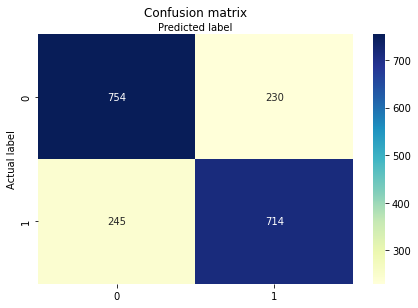

In [ ]:
# use to plot a heatmpa graph to show the value of TP, TF, FP, FF
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cmap), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

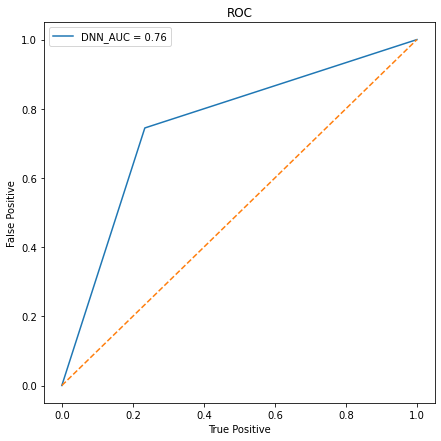

In [ ]:
# use to create the ROC curve graph (Receiver Operating Characteristic Curve graph)
# use to determine the AUC (Area Under the ROC Curve)
# the higher the value for ROC, the more accurate the model is
# the AUC value is 0.76 which within the acceptable range
import sklearn.metrics as metrics
FP, TP, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(FP, TP)

import matplotlib.pyplot as plt
plt.subplots(1, figsize = (7, 7))
plt.title('ROC') # Receiver Operating Characteristic
plt.plot(FP, TP, label = 'DNN_AUC = %0.2f' % roc_auc)
plt.plot([0, 1], ls = '--')
plt.xlabel("True Positive")
plt.ylabel("False Positive")
plt.legend()

In [ ]:
#pip install scikeras[tensorflow]
# to install scikeras to perform gridsearchcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# to perform gridCVSearch for Hyperparameter tuning
# in order to be able run, the model buidling is created using a function
def build_model():

  classifier = Sequential()

  # define the IL and first HL
  classifier.add(Dense(units = 350, kernel_initializer = "random_normal", activation = 'relu', input_dim = 6)) #number of neurons for the hidden layer
  classifier.add(Dropout(0.2)) # preventing overfitting

  # define another HL with 250 unit and Dropout of 0.2
  classifier.add(Dense(units = 250,  kernel_initializer = "random_normal", activation = 'relu'))
  classifier.add(Dropout(0.2)) # preventing overfitting

  # OL
  classifier.add(Dense(units = 1,  kernel_initializer = "random_normal", activation = 'sigmoid')) # TV is binary
  classifier.add(Dropout(0.2)) # preventing overfitting

  # compile
  classifier.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

  return classifier

# importing the libraries that is needed
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# saved the prebuild DNN into model variable
model = KerasClassifier(model = build_model, verbose = 2)

# the parameter that is going to be tuning include batch_size, epochs, and shuffle
batch_size = [16, 32, 64, 128]
epochs = [50, 100, 150]
shuffle = [True, False]

# add all the value into the dictionary
param_grid = dict()
param_grid['batch_size'] = batch_size
param_grid['epochs'] = epochs
param_grid['shuffle'] = shuffle

# perform GridSearch adn build the model accordingly to the best parameter
DNN_grid = GridSearchCV(model, param_grid, cv = 5, n_jobs = -1, verbose = 1)

# perform data fitting where the model will be trained using the train data under the best hyperparameter
DNN_grid = DNN_grid.fit(x_train, y_train)

print(DNN_grid.best_params_)
print(DNN_grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: ignored

In [ ]:
# Perform Prediction using x_text for the new tuned model, saving the prediction value into y_pred_best
y_pred_best = DNN_grid.best_estimator_.predict(x_test)
y_pred_best = (y_pred_best > 0.5)
y_pred_best

array([ True, False, False, ..., False,  True, False])

In [ ]:
# Evaluate the Tuned Model by Accuracy, Precision, Recall and F1 Score
#
# The accuracy of the model is 0.748 which is within the acceptable range but it has dropped compared to the original model
# Same go towards the other score such as
# precison -> 0.783 (increase)
# recall -> 0.678 (decrease)
# F1 score -> 0.72 (decrease)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy of MLP Classifier: ', accuracy_score(y_test, y_pred_best))
print('Precision of MLP Classifier: ', precision_score(y_test, y_pred_best, average = 'binary'))
print('Recall of MLP Classifier: ', recall_score(y_test, y_pred_best, average = 'binary'))
print('F1 Score of MLP Classifier: ', f1_score(y_test, y_pred_best, average = 'binary'))

Accuracy of MLP Classifier:  0.7488419969119917
Precision of MLP Classifier:  0.7833935018050542
Recall of MLP Classifier:  0.6788321167883211
F1 Score of MLP Classifier:  0.7273743016759776


In [ ]:
# print out the similar result on accuracy, precision, recall and F1 score using the classification report for tuned model
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       984
           1       0.78      0.68      0.73       959

    accuracy                           0.75      1943
   macro avg       0.75      0.75      0.75      1943
weighted avg       0.75      0.75      0.75      1943



In [ ]:
# Find out the value of TP, TF, FP, FF
# where the value will then show in the heatmap in the following code
newcmap = confusion_matrix (y_test, y_pred_best)
newcmap

array([[804, 180],
       [308, 651]])

Text(0.5, 257.44, 'Predicted label')

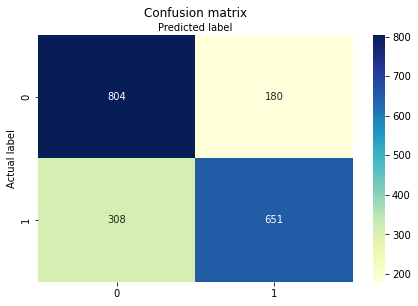

In [ ]:
# use to plot a heatmpa graph to show the value of TP, TF, FP, FF
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(newcmap), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

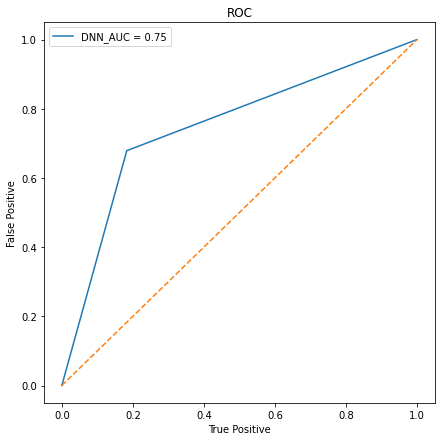

In [ ]:
# use to create the ROC curve graph (Receiver Operating Characteristic Curve graph)
# use to determine the AUC (Area Under the ROC Curve)
# the higher the value for ROC, the more accurate the model is
# the AUC value is 0.75 which has been dropped compare to the initial model (0.76)
# but it is still acceptable as it is within the acceptable range.
import sklearn.metrics as metrics
FP, TP, threshold = metrics.roc_curve(y_test, y_pred_best)
roc_auc = metrics.auc(FP, TP)

import matplotlib.pyplot as plt
plt.subplots(1, figsize = (7, 7))
plt.title('ROC') # Receiver Operating Characteristic
plt.plot(FP, TP, label = 'DNN_AUC = %0.2f' % roc_auc)
plt.plot([0, 1], ls = '--')
plt.xlabel("True Positive")
plt.ylabel("False Positive")
plt.legend()